In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [2]:
cereals = pd.read_csv("cereals.csv", na_values='-1')
non_nan_cereals = cereals.dropna()

In [3]:
potass = non_nan_cereals['potass']
carbo = non_nan_cereals['carbo']
sugars = non_nan_cereals['sugars']
input_data = non_nan_cereals[['calories','protein','fat','sodium','fiber','carbo','sugars']]
input_data2 = non_nan_cereals[['calories','protein','fat','sodium','fiber','sugars','potass']]
input_data3 = non_nan_cereals[['calories','protein','fat','sodium','fiber','carbo','potass']]

In [4]:
regr1 = linear_model.LinearRegression()
regr1.fit(input_data, potass)
print('Coefficients: \n', regr1.coef_)
print(regr1.score(input_data, potass))
# cereal[cereal['potass'].isnull()] = lin_reg

Coefficients: 
 [ -8.26490621e-01   1.27561974e+01   1.67779862e+01  -2.08961933e-02
   2.67733038e+01   5.60497878e+00   6.47728169e+00]
0.89973033754


In [5]:
regr2 = linear_model.LinearRegression()
regr2.fit(input_data2, carbo)
print('Coefficients: \n', regr1.coef_)
print(regr2.score(input_data2, carbo))

Coefficients: 
 [ -8.26490621e-01   1.27561974e+01   1.67779862e+01  -2.08961933e-02
   2.67733038e+01   5.60497878e+00   6.47728169e+00]
0.928990964659


In [6]:
regr3 = linear_model.LinearRegression()
regr3.fit(input_data3, sugars)
print('Coefficients: \n', regr1.coef_)
print(regr3.score(input_data3, sugars))

Coefficients: 
 [ -8.26490621e-01   1.27561974e+01   1.67779862e+01  -2.08961933e-02
   2.67733038e+01   5.60497878e+00   6.47728169e+00]
0.93735944243


In [7]:
regr1.predict([110, 2, 2, 200, 1, 14, 8])[0]

75.707647864702906

In [8]:
regr1.predict([100,3,0,80,1.0,21.0,0])[0]

53.09692025380113

In [9]:
regr2.predict([100,5,2,0,2.7,0,110])[0]

15.124546851334799

In [10]:
regr3.predict([100,5,2,0,2.7,15,110])[0]

0.42918545482971071

In [11]:
cereals['potass'][4] = 71
cereals['potass'][20] = 53
cereals['carbo'][57] = 15
cereals['sugars'][57] = 0

/Users/traciarms/ironyard/sandbox/honey-nut-clusters/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/traciarms/ironyard/sandbox/honey-nut-clusters/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/traciarms/ironyard/sandbox/honey-nut-clusters/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [12]:
conv_cups = cereals
conv_columns = ['calories','protein','fat','sodium','fiber','carbo','sugars', 'potass', 'weight', 'cups']

In [13]:
cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.50
4,Almond_Delight,R,C,110,2,2,200,1,14,8,71,25,3,1,0.75


In [14]:
for column in cereals.ix[:,4:12].columns:
    conv_cups[column] = conv_cups[column] * (1/conv_cups['cups'])

In [15]:
cereal_weighted = conv_cups

In [16]:
# now create the sparse array

In [17]:
cereal_weighted = cereal_weighted.drop('name', 1)

In [18]:
cereal_weighted.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,N,C,70,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,3,1,0.33
1,Q,C,120,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,3,1,1.00
2,K,C,70,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,969.696970,75.757576,3,1,0.33
3,K,C,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,1,0.50
4,R,C,110,2.666667,2.666667,266.666667,1.333333,18.666667,10.666667,94.666667,33.333333,3,1,0.75


In [122]:
cereal_sparse = pd.get_dummies(cereal_weighted, columns=['mfr', 'type'])

In [123]:
#cereal_sparse = cereal_sparse.drop('name', 1)

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca = PCA(n_components=2)
pca.fit(cereal_sparse)
reduced_X = pca.transform(cereal_sparse)

In [126]:
# plt.scatter(reduced_X[:, 0], reduced_X[:, 1])
# plt.title("Cereal clusters")
# plt.show()

In [127]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(4)
# y_pred = kmeans.fit_predict(reduced_X)
# new_reduced_X = sklearn.preprocessing.scale(reduced_X, axis=0, with_mean=True, with_std=True, copy=True)
# new_y_pred = kmeans.fit_predict(new_reduced_X)

In [128]:
# plt.scatter(new_reduced_X[:, 0], new_reduced_X[:, 1], c=new_y_pred, cmap="hot")
# plt.title("Cereal clusters")
# plt.show()

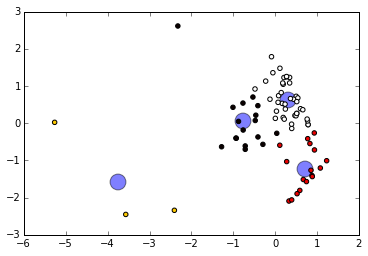

In [129]:
kmeans2 = KMeans(4)
labels = kmeans2.fit_predict(new_reduced_X)

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], alpha=.5, s=250)
plt.scatter(new_reduced_X[:, 0], new_reduced_X[:, 1], c=labels, cmap="hot")
plt.show()

In [130]:
print(labels)

[2 1 2 2 3 3 3 3 0 0 3 3 3 0 3 3 3 1 3 0 1 3 0 3 3 3 1 0 0 3 1 3 3 0 0 3 3
 3 3 3 3 3 3 1 1 1 0 3 3 0 3 0 0 3 1 1 0 1 0 0 1 3 3 1 1 1 1 3 1 3 0 3 3 3
 3 3 3]


In [131]:
names = cereals.name.get_values()

In [132]:
names_groups = list(zip(names, y_pred))

In [133]:
names_groups = pd.DataFrame(names_groups)

In [134]:
names_groups.sort(columns=1, inplace=True)

In [135]:
grouped_cereals = cereals.join(names_groups)

In [136]:
grouped_cereals = grouped_cereals[['name', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 1]]

In [137]:
grouped_cereals.rename(columns={1: 'Groups'}, inplace=True)

In [138]:
#grouped_cereals

In [139]:
grouped_cereals1 = grouped_cereals[ grouped_cereals['Groups'] == 0]
grouped_cereals2 = grouped_cereals[ grouped_cereals['Groups'] == 1]
grouped_cereals3 = grouped_cereals[ grouped_cereals['Groups'] == 2]
grouped_cereals4 = grouped_cereals[ grouped_cereals['Groups'] == 3]

In [140]:
grouped_cereals = grouped_cereals.pivot_table(columns='Groups')

In [141]:
grouped_cereals

Groups,0,1,2,3
calories,116.470588,63.333333,110.487805,95.625000
carbo,26.009711,17.454545,17.483519,17.537313
fat,2.638652,2.020202,1.143430,0.832400
fiber,6.264932,28.525253,1.154329,2.347559
potass,266.341554,826.060606,70.356453,107.439168
protein,5.554075,10.747475,2.458565,3.194207
sodium,307.662224,487.272727,226.575967,27.466856
sugars,13.799931,11.111111,8.420580,6.049716
vitamins,50.446963,67.171717,37.738785,15.187027


In [100]:
grouped_cereals1

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,Groups
4,Almond_Delight,110,2.666667,2.666667,266.666667,1.333333,18.666667,10.666667,94.666667,33.333333,0
5,Apple_Cinnamon_Cheerios,110,2.666667,2.666667,240.000000,2.000000,14.000000,13.333333,93.333333,33.333333,0
6,Apple_Jacks,110,2.000000,0.000000,125.000000,1.000000,11.000000,14.000000,30.000000,25.000000,0
7,Basic_4,130,4.000000,2.666667,280.000000,2.666667,24.000000,10.666667,133.333333,33.333333,0
10,Cap'n'Crunch,120,1.333333,2.666667,293.333333,0.000000,16.000000,16.000000,46.666667,33.333333,0
11,Cheerios,110,4.800000,1.600000,232.000000,1.600000,13.600000,0.800000,84.000000,20.000000,0
12,Cinnamon_Toast_Crunch,120,1.333333,4.000000,280.000000,0.000000,17.333333,12.000000,60.000000,33.333333,0
14,Cocoa_Puffs,110,1.000000,1.000000,180.000000,0.000000,12.000000,13.000000,55.000000,25.000000,0
15,Corn_Chex,110,2.000000,0.000000,280.000000,0.000000,22.000000,3.000000,25.000000,25.000000,0
16,Corn_Flakes,100,2.000000,0.000000,290.000000,1.000000,21.000000,2.000000,35.000000,25.000000,0


In [43]:
grouped_cereals2

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,Groups
4,Almond_Delight,110,2.666667,2.666667,266.666667,1.333333,18.666667,10.666667,94.666667,33.333333,1
5,Apple_Cinnamon_Cheerios,110,2.666667,2.666667,240.000000,2.000000,14.000000,13.333333,93.333333,33.333333,1
6,Apple_Jacks,110,2.000000,0.000000,125.000000,1.000000,11.000000,14.000000,30.000000,25.000000,1
7,Basic_4,130,4.000000,2.666667,280.000000,2.666667,24.000000,10.666667,133.333333,33.333333,1
10,Cap'n'Crunch,120,1.333333,2.666667,293.333333,0.000000,16.000000,16.000000,46.666667,33.333333,1
11,Cheerios,110,4.800000,1.600000,232.000000,1.600000,13.600000,0.800000,84.000000,20.000000,1
12,Cinnamon_Toast_Crunch,120,1.333333,4.000000,280.000000,0.000000,17.333333,12.000000,60.000000,33.333333,1
14,Cocoa_Puffs,110,1.000000,1.000000,180.000000,0.000000,12.000000,13.000000,55.000000,25.000000,1
15,Corn_Chex,110,2.000000,0.000000,280.000000,0.000000,22.000000,3.000000,25.000000,25.000000,1
16,Corn_Flakes,100,2.000000,0.000000,290.000000,1.000000,21.000000,2.000000,35.000000,25.000000,1


In [44]:
grouped_cereals3

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,Groups
0,100%_Bran,70,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,2
2,All-Bran,70,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,969.696970,75.757576,2
3,All-Bran_with_Extra_Fiber,50,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,2


In [45]:
grouped_cereals4

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,Groups
1,100%_Natural_Bran,120,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,3
17,Corn_Pops,110,1.000000,0.000000,90.000000,1.000000,13.000000,12.000000,20.000000,25.000000,3
20,Cream_of_Wheat_(Quick),100,3.000000,0.000000,80.000000,1.000000,21.000000,0.000000,53.000000,0.000000,3
26,Frosted_Mini-Wheats,100,3.750000,0.000000,0.000000,3.750000,17.500000,8.750000,125.000000,31.250000,3
30,Golden_Crisp,100,2.272727,0.000000,51.136364,0.000000,12.500000,17.045455,45.454545,28.409091,3
43,Maypo,100,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,95.000000,25.000000,3
44,"Muesli_Raisins,_Dates,_&_Almonds",150,4.000000,3.000000,95.000000,3.000000,16.000000,11.000000,170.000000,25.000000,3
54,Puffed_Rice,50,1.000000,0.000000,0.000000,0.000000,13.000000,0.000000,15.000000,0.000000,3
55,Puffed_Wheat,50,2.000000,0.000000,0.000000,1.000000,10.000000,0.000000,50.000000,0.000000,3
57,Quaker_Oatmeal,100,7.462687,2.985075,0.000000,4.029851,22.388060,0.000000,164.179104,0.000000,3


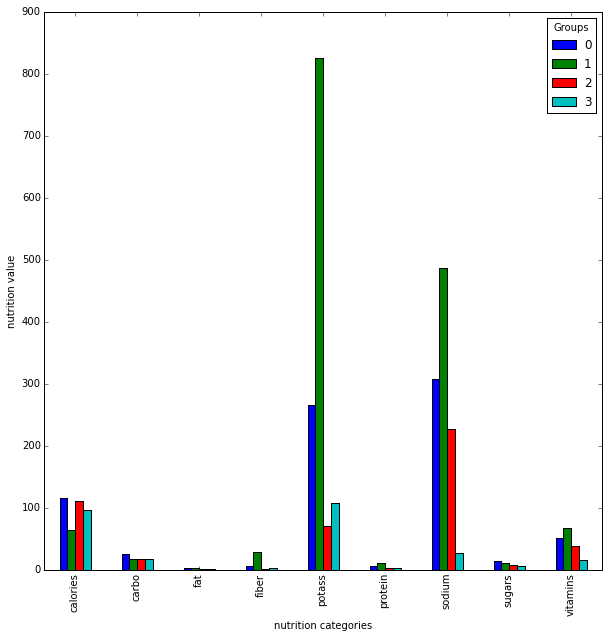

In [144]:
grouped_cereals.plot(kind='bar', figsize=(10,10))
y_label = plt.ylabel('nutrition value')
x_label = plt.xlabel('nutrition categories')
plt.title("Iris data in 3 clusters")
plt.show()

#Group 1 - grouped by highest content of potassium & sodium.

#Group 2 - grouped by high potassium & sodium and also has high calories.

# Group 3 - grouped by high sodium and calories

# Group 4 - grouped by potassium & calories